#### Використовуючи дані із файлу petrol_consumption.csv побудуйте модель множинної регресії для знаходження залежності між значеннями споживання бензину і похідними факторами. Оцініть якість отриманої регресії.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

In [2]:
data = 'petrol_consumption.csv'

In [3]:
pc = pd.read_csv(data)
pc.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


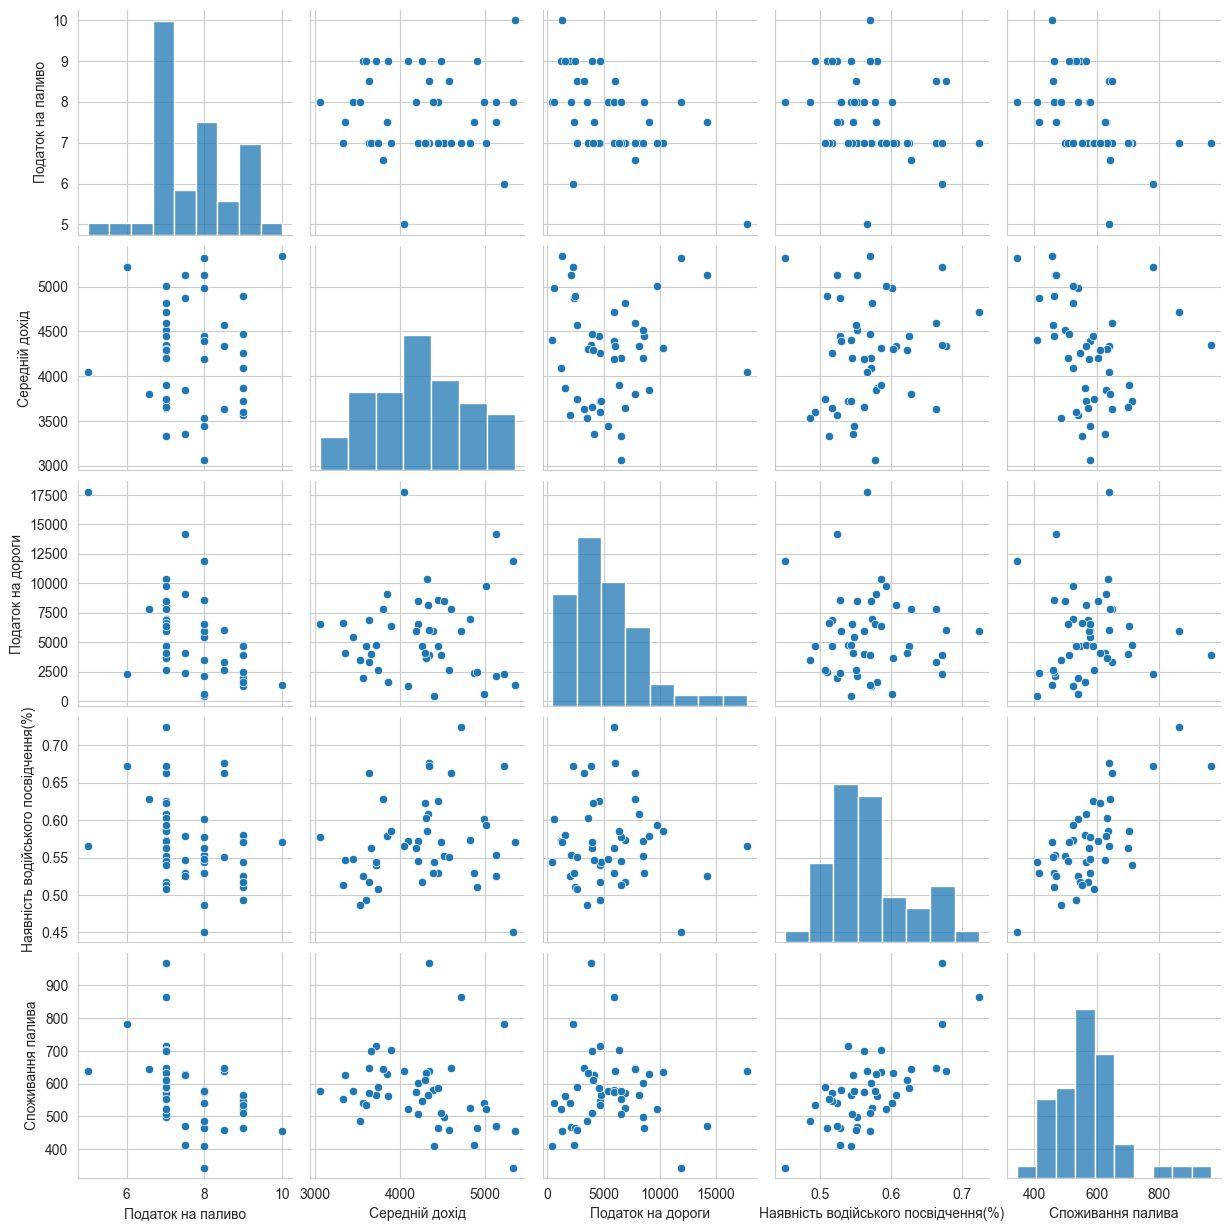

In [4]:
pc.columns = ['Податок на паливо', 'Середній дохід', 'Податок на дороги', 'Наявність водійського посвідчення(%)', 'Споживання палива']
sb.pairplot(pc)

In [5]:
correlations = pc.corr()
correlations

,Податок на паливо,Середній дохід,Податок на дороги,Наявність водійського посвідчення(%),Споживання палива
Податок на паливо,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Середній дохід,0.012665,1.000000,0.050163,0.157070,-0.244862
Податок на дороги,-0.522130,0.050163,1.000000,-0.064129,0.019042
Наявність водійського посвідчення(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Споживання палива,-0.451280,-0.244862,0.019042,0.698965,1.000000


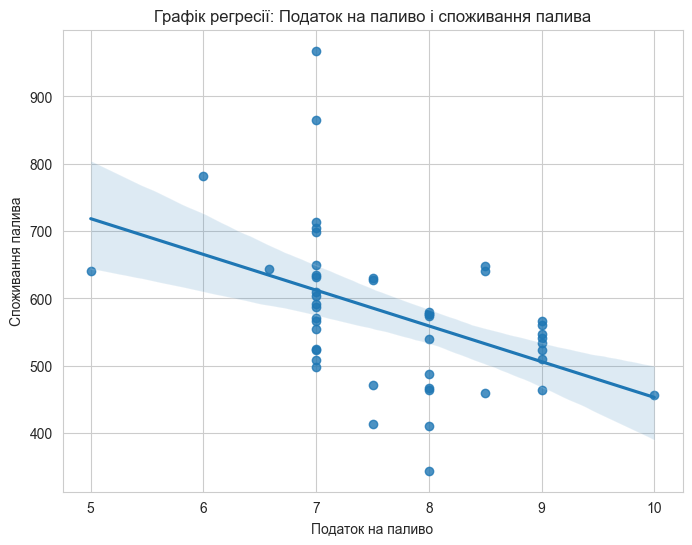

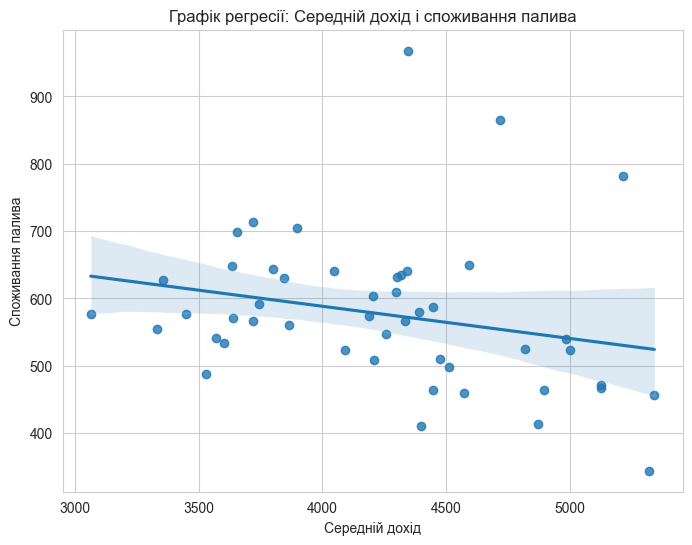

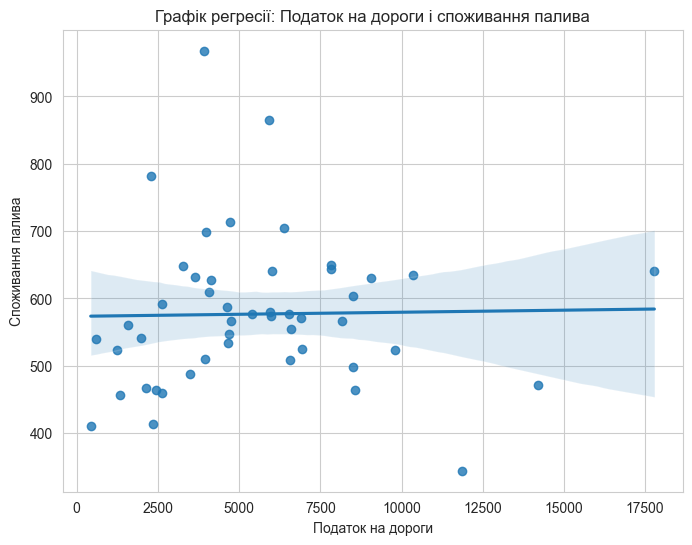

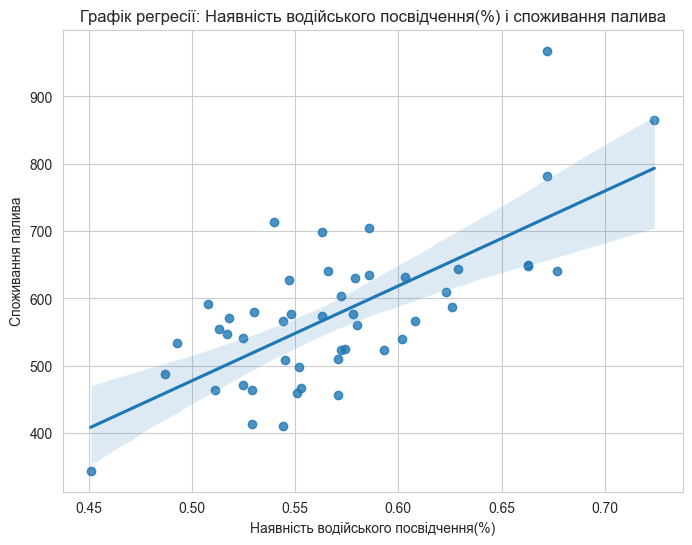

In [6]:
variables = ['Податок на паливо', 'Середній дохід', 'Податок на дороги', 'Наявність водійського посвідчення(%)']

for var in variables:
    plt.figure(figsize=(8, 6), dpi=100)
    sb.regplot(x=var, y='Споживання палива', data=pc).set(title=f'Графік регресії: {var} і споживання палива')

In [7]:
correlations = pc[variables].corr()
correlations

,Податок на паливо,Середній дохід,Податок на дороги,Наявність водійського посвідчення(%)
Податок на паливо,1.000000,0.012665,-0.522130,-0.288037
Середній дохід,0.012665,1.000000,0.050163,0.157070
Податок на дороги,-0.522130,0.050163,1.000000,-0.064129
Наявність водійського посвідчення(%),-0.288037,0.157070,-0.064129,1.000000


In [8]:
X = pc[variables]
y = pc['Споживання палива']

In [9]:
SEED = 48
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [10]:
X.shape

(48, 4)

In [11]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [12]:
print('beta_0', regression.intercept_)
print('beta_n', regression.coef_)

beta_0 344.58590039668604
beta_n [-3.53997019e+01 -5.87239243e-02 -3.65626158e-03  1.37093925e+03]


In [13]:
y_pred = regression.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
45,510,531.533629
3,414,509.733619
1,524,565.297211
14,566,646.095575
37,704,647.966027
40,587,676.771823
9,498,557.480292
11,471,445.944682
19,640,694.919622
24,460,520.896984


In [14]:
regression.score(X_train, y_train)

0.6895815278628231

In [15]:
regression.score(X_test, y_test)

0.4281868349137399

Обчислимо показники якості лінійної регресії:

In [38]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [45]:
print(f'Середня абсолютна похибка (Mean Absolute Error (MAE)): {mae: .2f}')
print(f'Середня квадратична похибка (Mean Squared Error (MSE)): {mse: .2f}')
print(f'Корінь середньої квадратичної похибки (Root Mean Squared Error (RMSE)): {rmse: .2f}')

Середня абсолютна похибка (Mean Absolute Error (MAE)):  58.48
Середня квадратична похибка (Mean Squared Error (MSE)):  3983.85
Корінь середньої квадратичної похибки (Root Mean Squared Error (RMSE)):  63.12


#### Висновки: Ми отримали показники точності для тренувальних і тестувальних даних - 0.68 і 0.42 відповідно. Також ми маємо показники оцінки якості лінійної регресії, зокрема Корінь середньої квадратичної похибки (Root Mean Squared Error (RMSE)) = 63.12 при тому, що кількість елементів нашої вибірки = 48. Виходячи з цих показників, ми можемо зробити висновок, що наша модель не є надійною. Скоріше за все, для покращення показників нашої моделі потрібно використати крос-валідацію та регуляризацію даних.